# Introduction to Neural Networks and DeepLearning using stand-alone Python or Kares+Tensorflow


IBM "Build and train a neural net from scratch in Python or Keras+TensorFlow-UnvJyfGwBHo.mp4" in my YouTube collections. Also on [WKS SW RD FTP](ftp://win10rs@10.42.96.127/python/Tutorial/Build and train a neural net from scratch in Python or Keras+TensorFlow-UnvJyfGwBHo.mp4).

The announcement https://developer.ibm.com/event/introduction-neural-networks-deeplearning-using-stand-alone-python-kerastensorflow/ <br>
The resources http://ibm.biz/dwlive011  actually redirected to https://developer.ibm.com/tv/dwlive011-replay-neural-net-python/ 

There are two videos on YouTube, I don't know what is the difference yet. <br>
- https://www.youtube.com/watch?v=oJoPbwmVBlk uploaded by [developerWorks Live Webcasts](https://www.youtube.com/channel/UC9sPZ_Msov86IchqlwjBNXg)
- https://www.youtube.com/watch?v=UnvJyfGwBHo uploaded by [Romeo Kienzler](https://www.youtube.com/channel/UC_zIqSWu-yQcBAywLtHDAfg)

### See also 
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ <br>
or My Ynote: "Develop Your First Neural Network in Python With Keras Step-By-Step"


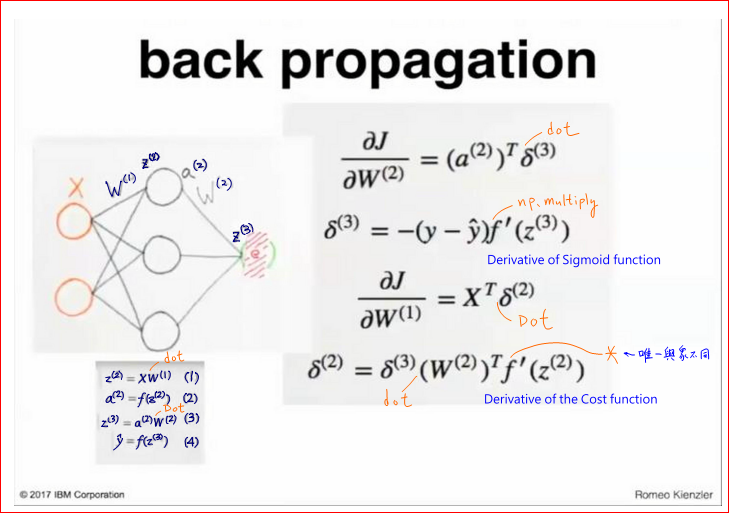

In [2]:
from IPython.display import Image; Image(filename='NN-forward-back-propagation.png')

$$
z^{(2)} = X \centerdot W^{(1)} \tag{1}\\
$$

$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$

$$
z^{(3)} = a^{(2)} \centerdot W^{(2)} \tag{3}\\
$$

$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$

$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}
$$

$$
\frac{\partial J}{\partial W^{(2)}} = 
(a^{(2)})^T
\centerdot
\delta^{(3)} \tag{6}
$$

$$
\delta^{(3)} = -(y-\hat{y}) 
\times 
f^\prime(z^{(3)})   \tag{7}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}
\centerdot
\delta^{(2)} \tag{8}
$$

$$
\delta^{(2)} = \delta^{(3)} 
\centerdot
(W^{(2)})^{T}
\times
f^\prime(z^{(2)})  \tag{9}
$$


In [1]:
import peforth
import numpy as np

In [2]:
%%f
none value nn

In [3]:
class Neural_Network(object):
    def __init__(self):
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        peforth.push(self).ok('init>', cmd='to nn')

    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        peforth.push(self).ok('forward>', cmd='to nn')
        return yHat
    
    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = 0.5 * sum((y - self.yHat)**2)
        peforth.push(self).ok('costFunction>', cmd='to nn')
        return J
    
    # Derivative of Sigmoid 求其導函數
    # See http://www.mathcaptain.com/trigonometry/sigmoid-function.html
    def sigmoidPrime(self, z):
        return np.exp(-z) / ((1 + np.exp(-z))**2)
    
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        djdw2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        djdw1 = np.dot(X.T, delta2)
        peforth.push(self).ok('costFunctionPrime>', cmd='to nn')
        
        return djdw1, djdw2
    

Note! (matrix or data frame).T is 「轉置矩陣」, axis 互換。用 OneDrive 文件 Jupyter Notebooks / I study Pandas.ipynb 試驗一下就知道了。我記得好像在學 R language 時有玩過 df.T --> Yes! See Ynote:`"Rotate a Matrix in R transposing a matrix"`

    nn :> W1.shape tib. \ ==> (2, 3) (<class 'tuple'>)
    nn :> z2.shape tib. \ ==> (3, 3) (<class 'tuple'>)
    nn :> a2.shape tib. \ ==> (3, 3) (<class 'tuple'>)
    nn :> W2.shape tib. \ ==> (3, 1) (<class 'tuple'>)
    nn :> z3.shape tib. \ ==> (3, 1) (<class 'tuple'>)


In [4]:
X = np.array(([3,5], [5,1], [10,2]),dtype=float)
y = np.array(([75], [82], [93]),dtype=float)

%f __main__ :> X.shape tib.
%f __main__ :> y.shape tib.



__main__ :> X.shape tib. \ ==> (3, 2) (<class 'tuple'>)
__main__ :> y.shape tib. \ ==> (3, 1) (<class 'tuple'>)


In [ ]:
%pdb on
NN = Neural_Network()
max_iterations = 10000
iter = 0
learningRate = 0.1
while iter < max_iterations:
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

    NN.W1 = NN.W1 - learningRate * dJdW1
    NN.W2 = NN.W2 - learningRate * dJdW2

    if iter % 1000 == 0:
        print(NN.costFunction(X,y))

    iter += 1
    peforth.ok('main while iter>', loc=locals(), cmd=':> [0] constant locals')

    

Automatic pdb calling has been turned ON
init>words
code end-code \ // <selftest> </selftest> bye /// immediate stop compyle trim indent -indent <py> </py> </pyV> words . cr help interpret-only compile-only literal reveal privacy (create) : ; ( BL CR word ' , [compile] py: py> py:~ py>~ 0branch here! here swap ! @ ? >r r> r@ drop dup over 0< + * - / 1+ 2+ 1- 2- compile if then compiling char last version execute cls private nonprivate (space) exit ret rescan-word-hash (') branch bool and or not (forget) AND OR NOT XOR true false "" [] {} none >> << 0= 0> 0<> 0<= 0>= = == > < != >= <= abs max min doVar doNext depth pick roll space [ ] colon-word create (marker) marker next abort alias <> public nip rot -rot 2drop 2dup invert negate within ['] allot for begin until again ahead never repeat aft else while ?stop ?dup variable +! chars spaces .( ." .' s" s' s` does> count accept <accept> nop </accept>  case of endof endcase refill [else] [if] [then] (::) (:>) :: :> ::~ :>~ "msg"abort abort

In [ ]:
peforth.ok()